In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nn

In [2]:
model = nn.Model()    

In [3]:
model = nn.Model() 
model.add(nn.Layer(units=8, activation='relu'))
model.add(nn.Layer(units=3, activation='softmax'))

In [4]:
model.compile(optimization="gds", loss="quadratic", metrics="accuracy")

In [5]:
dataset = pd.read_csv("iris.data")

In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values.reshape(-1, 1)

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder="passthrough")

y = transformer.fit_transform(y)

In [8]:
(X_train, y_train), (X_valid, y_valid), (X_test, y_test) = nn.train_validation_test(X, y, validation_size=0.15, test_size=0.15, random_state=42)

In [9]:
model.fit(X_train, y_train,
          validation_data=(X_valid, y_valid),
          epochs=3000, autoHyperTunning=True)

+++ Epoch 0 +++
Train accuracy: 0.38, train loss: 1.25
Validation accuracy: 0.23, validation loss: 1.55
+++ Epoch 1 +++
Train accuracy: 0.38, train loss: 1.25
Validation accuracy: 0.23, validation loss: 1.55
+++ Epoch 2 +++
Train accuracy: 0.38, train loss: 1.25
Validation accuracy: 0.23, validation loss: 1.55
+++ Epoch 3 +++
Train accuracy: 0.38, train loss: 1.25
Validation accuracy: 0.23, validation loss: 1.55
+++ Epoch 4 +++
Train accuracy: 0.38, train loss: 1.25
Validation accuracy: 0.23, validation loss: 1.55
+++ Epoch 5 +++
Train accuracy: 0.38, train loss: 1.25
Validation accuracy: 0.23, validation loss: 1.54
+++ Epoch 6 +++
Train accuracy: 0.38, train loss: 1.25
Validation accuracy: 0.23, validation loss: 1.54
+++ Epoch 7 +++
Train accuracy: 0.38, train loss: 1.25
Validation accuracy: 0.23, validation loss: 1.54
+++ Epoch 8 +++
Train accuracy: 0.38, train loss: 1.25
Validation accuracy: 0.23, validation loss: 1.54
+++ Epoch 9 +++
Train accuracy: 0.38, train loss: 1.25
Validatio

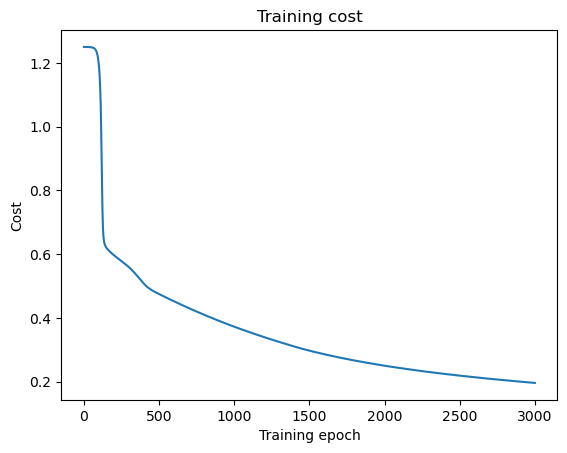

In [10]:
model.showTrainingCost()

In [11]:
y_pred = model.predict(X)
print(nn.confusionMatrix(y_pred, y))
print(nn.accuracy(y_pred, y))

[[49.  0.  0.]
 [ 0. 46.  4.]
 [ 0.  1. 49.]]
0.9664429530201343


In [13]:
y_pred = model.predict(X_test)
print(nn.confusionMatrix(y_pred, y_test))
print(nn.accuracy(y_pred, y_test))

[[ 5.  0.  0.]
 [ 0.  5.  1.]
 [ 0.  0. 12.]]
0.9565217391304348
